## Group 22 Project Proposal

## Introduction:

Everyone has at some point heard, either from a doctor or a person who has visited one, about the risk factors that lead to heart disease. Most professionals cite things like blood pressure, obesity, blood sugar level, diabetes, blood-cholesterol concentration and other chemical and physical factors that cause heart disease. With this in mind, we will be working with the UC Irvine Heart Disease dataset to answer our question: can we use the relevant data within to predict whether someone will be diagnosed with heart disease or not?


The dataset contains fourteen variables age, sex, chest pain type, resting blood pressure in mmHg (millimeters of mercury), cholesterol levels in mg/dl (milligrams per deciliter), whether the patient's fasting blood sugar is above 120 mg/dl, type of resting electrocardiographic results, patient's maximum heart rate (bpm), whether exercise induced chest pain in a patient, the ST depression induced by exercise, the slope of the ST segment at peak exercise, the amount of blood vessels analyzed for a patient, whether the patient has Thalassemia (blood disorder) and finally the heart disease diagnosis.



## Preliminary exploratory data analysis:

**Reading the dataset in from the web**

In [1]:
#Dataset reading

#ESSENTIAL LIBRARIES
library(tidyverse)

col_names <-c("age", "sex", "chest_pain_type", "resting_blood_pressure", "cholesterol_concentration", "fasting_blood_sugar_greater",
              "resting_electro", "max_bpm", "induced_pain", "ST_depression","slope_of_st_seg", "amount_of_vessels_checked", "thalassemia", "diagnosis")

# append two dataframes to make an approproately sized dataset (cleveland and hungary together)
heart_disease_data <- read_csv("https://github.com/dislasriv/DSCI-100-Group-22-Project/raw/main/dataset/processed.cleveland.data", col_names = c(col_names)) |>
                      mutate(across(age:diagnosis, as.numeric)) |>
                      bind_rows(mutate(read_csv("https://github.com/dislasriv/DSCI-100-Group-22-Project/raw/main/dataset/processed.hungarian.data", col_names = c(col_names)),
                                across(age:diagnosis, as.numeric)))

#print
heart_disease_data

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): amount_of_vessels_checked, thalassemia
dbl (12): age, sex, chest_pain_type, resting_blood_pressure, cholesterol_con...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“There were 2 warnings in `mutate()`.
The first warning w

age,sex,chest_pain_type,resting_blood_pressure,cholesterol_concentration,fasting_blood_sugar_greater,resting_electro,max_bpm,induced_pain,ST_depression,slope_of_st_seg,amount_of_vessels_checked,thalassemia,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
62,0,4,140,268,0,2,160,0,3.6,3,2,3,3
57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
63,1,4,130,254,0,2,147,0,1.4,2,1,7,2


List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 15
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

Warning message:
“Removed 23 rows containing missing values (`geom_point()`).”
Warning message in geom_bar(aes(stat = "count", colour = diagnosis)):
“Ignoring unknown aesthetics: stat”


List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 15
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

ERROR while rich displaying an object: Error in `geom_bar()`:
! Problem while computing stat.
ℹ Error occurred in the 1st layer.
Caused by error in `setup_params()`:
! `stat_count()` must only have an x or y aesthetic.

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(r

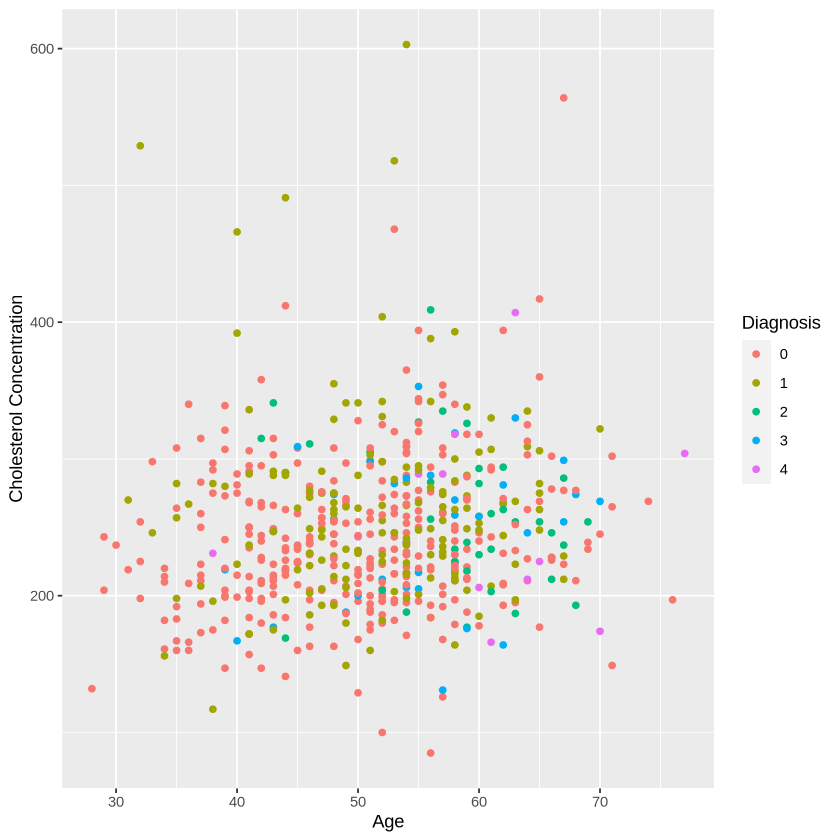

In [4]:
heart_disease_data <- heart_disease_data |>
        mutate(diagnosis = as_factor(diagnosis))

heart_disease_plot <- ggplot(data=heart_disease_data, aes(x=age, y=cholesterol_concentration))+
geom_point(aes(colour = diagnosis))+
labs(x = "Age", y = "Cholesterol Concentration", colour = "Diagnosis")
theme(text = element_text(size = 15))
heart_disease_plot

heart_disease_bar <- ggplot(data=heart_disease_data, aes(x=sex, y=resting_blood_pressure))+
geom_bar(aes(stat = "count", colour = diagnosis))+
labs(x = "Sex", y = "Resting Blood Pressure", colour = "Diagnosis")
theme(text = element_text(size = 15))
heart_disease_bar

## Methods:
(use cholesterol levels, resting blood pressure and any other variables that seem relevant, maybe 1 or two more)

## Expected outcomes and significance:

We expect that observations with higher values for our predictors are more likely to be classified as having heart disease, as is the societal notion.


The result of this data analysis could have several impacts. Say a correlation is found between our predictors and heart disease, in the real world, these results would likely not sitr up the pot too much. However, our visualizations and trends may possibly yield new data that can change how society approaches the fight against heart disease. Governments may change how they address heart disease publicly to account for our results, health organizations may start new campaigns to educate the public about our results, and new preventative measures may be developed as a result of our findings. If no correlation is found, this may challenge previously held societal notions of what causes heart disease. In the real world, this could revolutionize heart disease treatment and research, debunk a societal myth, and potentially cause the scientific community to come together and rediscuss heart disease as a whole.


One question that could arise from these findings is whether there are any other factors apart from our predictors that contribute to an increased risk of developing heart disease.


---------------------------------------------------------------------------------------------------------------------------------

# Group 22 Project Proposal

Jorge Martinez, Faraaz Jan, Diego Islas, Jocelyn Chan 

## Introduction:

Everyone has at some point heard, either from a doctor or a person who has visited one, about the risk factors that lead to heart disease. Most professionals cite things like blood pressure, obesity, blood sugar level, diabetes, blood-cholesterol, maximum heart rate, and other chemical and physical factors that cause heart disease. With this in mind, we will be using the cholesterol (chol), maximum heart beat (thalach) and age components within the the UC Irvine Heart Disease dataset to answer our predictive question.

**Predictive question: is there a relationship between cholesterol levels, maximum heart beat, age and the diagnois of heart disease.**

The data was found through the online platform of Kaggle (https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download) and will be used for our analysis.


In [24]:
library(tidyverse)
library(tidymodels)
library(dplyr)
library(purrr)
options(repr.matrix.maxrows = 10)

## Reading the Data

The dataset contains fourteen variables age, sex, chest pain type, resting blood pressure in mmHg (millimeters of mercury), cholesterol levels in mg/dl (milligrams per deciliter), whether the patient's fasting blood sugar is above 120 mg/dl, type of resting electrocardiographic results, patient's maximum heart rate (bpm), whether exercise induced chest pain in a patient, the ST depression induced by exercise, the slope of the ST segment at peak exercise, the amount of blood vessels analyzed for a patient, whether the patient has Thalassemia (blood disorder) and finally the heart disease diagnosis.

In [25]:
heart_disease_data <- read_csv("https://raw.githubusercontent.com/dislasriv/DSCI-100-Group-22-Project/main/heart.csv")
heart_disease_data

Rows: 1025 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


## Selecting Data

In [26]:
heart_disease_selected <- select(heart_disease_data, age, chol, thalach, target)|>
                          mutate(target=as_factor(target))|>
                          mutate(heart_disease=fct_recode(target, "Yes" = "1", "No " = "0"))
                          
heart_disease_selected

age,chol,thalach,target,heart_disease
<dbl>,<dbl>,<dbl>,<fct>,<fct>
52,212,168,0,No
53,203,155,0,No
70,174,125,0,No
⋮,⋮,⋮,⋮,⋮
47,275,118,0,No
50,254,159,1,Yes
54,188,113,0,No


## Analyzing Data

**NA Values**

In [27]:
sum(is.na(heart_disease_selected))

[1] 0

Since there aren't any missing NA varibales in the datase we chose, it is suitable to use these variables as our research analysis.

**Summary Table**

In [28]:
summary_table <- heart_disease_selected %>%
  summarise(across(c(age, chol, thalach), list(
    Mean = ~mean(.x, na.rm = TRUE),
    Median = ~median(.x, na.rm = TRUE),
    SD = ~sd(.x, na.rm = TRUE),
    Min = ~min(.x, na.rm = TRUE),
    Max = ~max(.x, na.rm = TRUE)
  ))) %>%
  pivot_longer(cols = everything(), names_to = c(".value", "Variable"), names_sep = "_")

print(summary_table)

# A tibble: 5 × 4
  Variable   age  chol thalach
  <chr>    <dbl> <dbl>   <dbl>
1 Mean     54.4  246     149. 
2 Median   56    240     152  
3 SD        9.07  51.6    23.0
4 Min      29    126      71  
5 Max      77    564     202  


## Visualization 

**Age vs Cholesterol** 

In [29]:
hd_select_chol <- select(heart_disease_selected,age,chol,heart_disease)|>
               mutate(heart_disease)
hd_select_chol

age,chol,heart_disease
<dbl>,<dbl>,<fct>
52,212,No
53,203,No
70,174,No
⋮,⋮,⋮
47,275,No
50,254,Yes
54,188,No


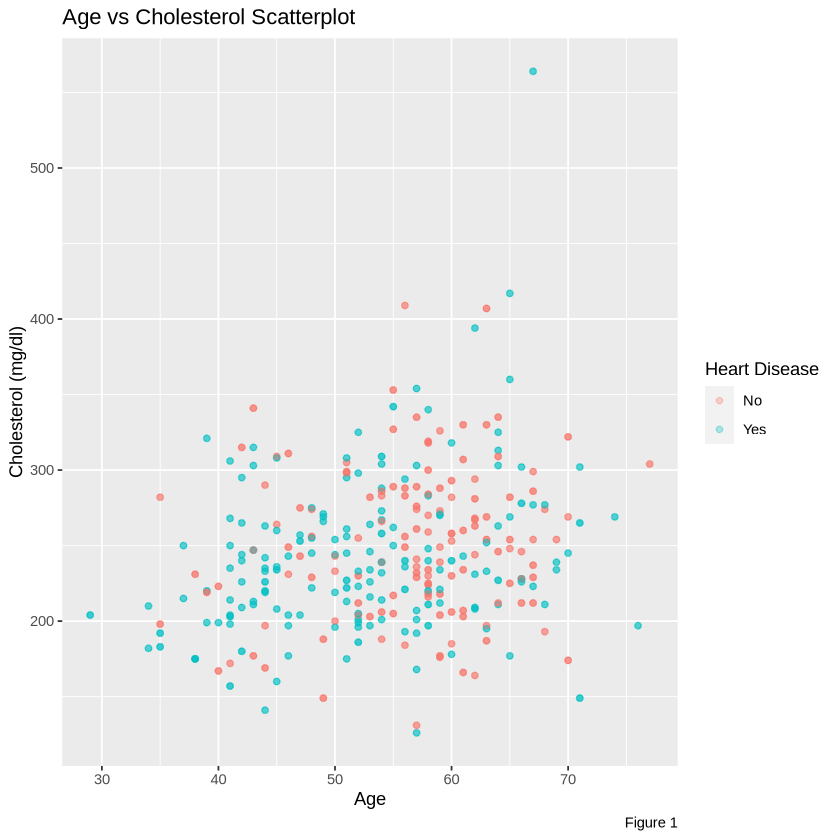

In [30]:
hd_chol_plot <- ggplot(hd_select_chol,aes(x = age, y = chol, colour = heart_disease)) +
                    geom_point(alpha = 0.3) +
                    labs(x = "Age", y = "Cholesterol (mg/dl)", colour = "Heart Disease", caption = "Figure 1") +       
                    ggtitle("Age vs Cholesterol Scatterplot")
hd_chol_plot

**Age vs Max Heart Rate**

In [31]:
hd_select_thalach <- select(heart_disease_selected,age,thalach,heart_disease)|>
                  mutate(heart_disease)
hd_select_thalach

age,thalach,heart_disease
<dbl>,<dbl>,<fct>
52,168,No
53,155,No
70,125,No
⋮,⋮,⋮
47,118,No
50,159,Yes
54,113,No


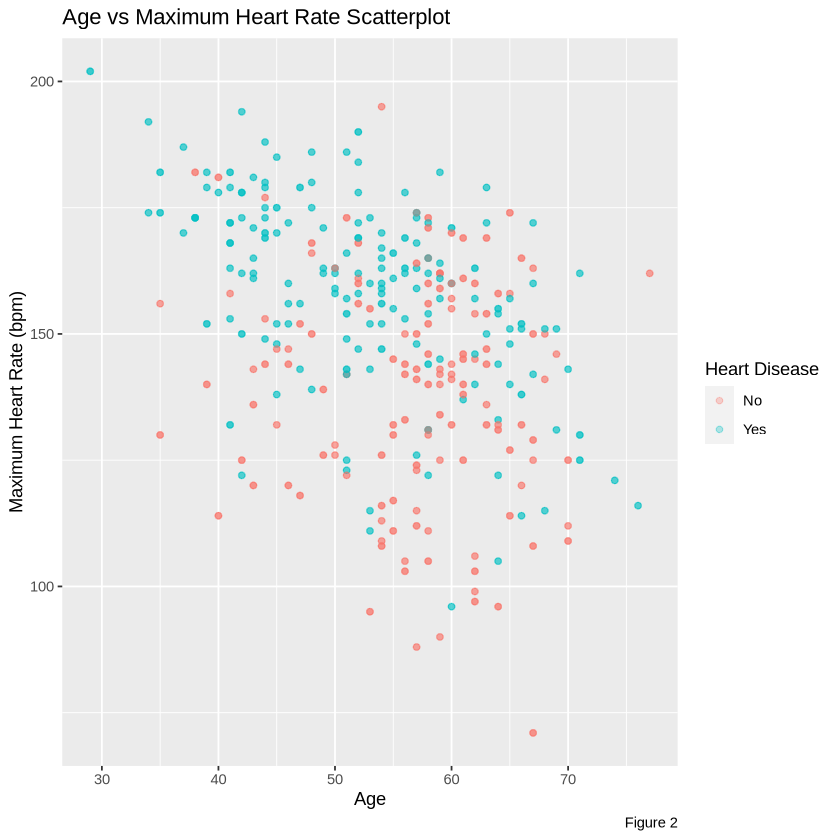

In [32]:
hd_thalach_plot <- ggplot(hd_select_thalach,aes(x = age, y = thalach, colour = heart_disease)) +
                       geom_point(alpha = 0.3)+
                       labs(x = "Age", y= "Maximum Heart Rate (bpm)", colour = "Heart Disease", caption = "Figure 2") +       
                       ggtitle("Age vs Maximum Heart Rate Scatterplot")
hd_thalach_plot